In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
office = pd.read_csv('../data/office_genres.csv')
mass = pd.read_csv('../../mass_proper_genres.csv')

antiphons = pd.read_csv('../data/all-ci-antiphons.csv')
responsories = pd.read_csv('../data/all-ci-responsories.csv')

chants = pd.concat([antiphons, responsories])
all_sources = pd.read_csv('../data/sources-of-all-ci-antiphons_OPTIONAL-CENTURY.csv')
used_sources = pd.read_csv('../data/sources-with-provenance-ids-and-two-centuries.csv')

feasts = pd.read_csv('../data/feast.csv')

geography = pd.read_csv('../data/geography_data.csv')

In [9]:
print('All office records:', len(office))
print('Office records with melody:', len(office.dropna(subset='volpiano')))
print()
print('All proper mass records', len(mass))
print('Proper mass records with melody:', len(mass.dropna(subset='volpiano')))

All office records: 581949
Office records with melody: 56400

All proper mass records 223654
Proper mass records with melody: 1686


In [29]:
print('All antiphons records:', len(antiphons))
print('All responsories records:', len(responsories))
print()
antiphons_of_used_s = antiphons[antiphons['source_id'].isin(used_sources['drupal_path'])]
responsories_of_used_s = responsories[responsories['source_id'].isin(used_sources['drupal_path'])]
print('Antiphons records after bigger sources selection:', len(antiphons_of_used_s))
print('Responsories records after bigger sources selection:', len(responsories_of_used_s))


All antiphons records: 251520
All responsories records: 123755

Antiphons records after bigger sources selection: 242028
Responsories records after bigger sources selection: 120544


In [22]:
print('All sources:', len(all_sources))
print('All sources with more then 100 chants:', len(used_sources))
print('All sources with more than 100 chants and geography info:', len(used_sources) - used_sources['provenance_id'].isnull().sum())

All sources: 816
All sources with more then 100 chants: 250
All sources with more than 100 chants and geography info: 231


In [30]:
freq_of_feasts = chants['feast_id'].value_counts()
print('Number of feasts we have office antiphons or responsories for:', len(freq_of_feasts))

bigger_feasts = freq_of_feasts.drop(freq_of_feasts[freq_of_feasts.values < 5].index).index.tolist()
feasts_without_fragments = feasts[feasts['id'].isin(bigger_feasts)]
print('Number of feasts we have at least 5 office antiphons or responsories for:', len(feasts_without_fragments))

antiphons_of_used_s_f = antiphons_of_used_s[antiphons_of_used_s['feast_id'].isin(feasts_without_fragments['id'])]
responsories_of_used_s_f = responsories_of_used_s[responsories_of_used_s['feast_id'].isin(feasts_without_fragments['id'])]
print('Antiphons records after bigger sources and feasts selection:', len(antiphons_of_used_s_f))
print('responsories records after bigger sources and feasts selection:', len(responsories_of_used_s_f))

Number of feasts we have office antiphons or responsories for: 1307
Number of feasts we have at least 5 office antiphons or responsories for: 1027
Antiphons records after bigger sources and feasts selection: 234299
responsories records after bigger sources and feasts selection: 116248


In [25]:
print('Number of geography places:', len(geography))

Number of geography places: 109


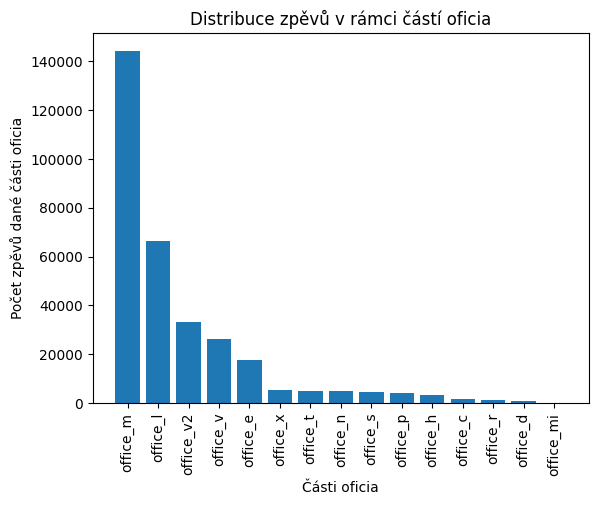

In [53]:
# Plot of office distribution
filtered_chants = pd.concat([antiphons_of_used_s_f, responsories_of_used_s_f])
office_distr = filtered_chants['office_id'].value_counts().to_dict()
plt.bar(x=office_distr.keys(), height=office_distr.values())
plt.xticks(rotation='vertical')
plt.xlabel('Části oficia')
plt.ylabel('Počet zpěvů dané části oficia')
plt.title('Distribuce zpěvů v rámci částí oficia')
plt.savefig(fname="office_dist.pdf", format="pdf")
plt.show()


In [23]:
# Get 10 feasts with most data
biggest_feasts = chants['feast_id'].value_counts()[:10].keys()

for feast_id in biggest_feasts.tolist():
    print(feasts[feasts['id'] == feast_id]['name'].values[0])

Nativitas Domini
Purificatio Mariae
Epiphania
Assumptio Mariae
Comm. Apostolorum
Comm. plurimorum Martyrum
Omnium Sanctorum
Dom. in Palmis
Fer. 5 in Cena Dom.
Joannis Baptistae
